In [2]:
import pandas as pd
pd_data = pd.read_csv('Filtered_data.csv')

In [3]:
pd_data.dropna(inplace=True)
pd_data.reset_index(drop=True,inplace=True)

In [4]:
pd_data.isnull().any()
pd_data.columns

Index(['Unnamed: 0', 'customer_city', 'customer_state', 'price',
       'freight_value', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_city', 'seller_state',
       'product_category_name_english', 'Distance in Miles',
       'Estimate and Purchase Date diff', 'Delivery and Purchase diff',
       'Estimate and delivery diff'],
      dtype='object')

In [5]:
pd_data.drop('customer_state',inplace=True, axis = 1)
pd_data.drop('seller_state',inplace=True, axis = 1)
pd_data.drop('Unnamed: 0',inplace=True, axis = 1)
pd_data['product_category_name_english'].unique()
#pd_data

array(['pet_shop', 'cool_stuff', 'furniture_decor', 'housewares',
       'fashion_bags_accessories', 'market_place', 'watches_gifts',
       'perfumery', 'health_beauty', 'small_appliances',
       'computers_accessories', 'garden_tools', 'luggage_accessories',
       'sports_leisure', 'construction_tools_lights', 'electronics',
       'telephony', 'musical_instruments', 'auto', 'baby',
       'arts_and_craftmanship', 'industry_commerce_and_business',
       'costruction_tools_tools',
       'kitchen_dining_laundry_garden_furniture', 'drinks', 'stationery',
       'construction_tools_construction', 'toys', 'food',
       'home_appliances_2', 'home_construction', 'fixed_telephony',
       'food_drink', 'furniture_living_room', 'air_conditioning',
       'signaling_and_security', 'office_furniture', 'bed_bath_table',
       'christmas_supplies', 'fashion_sport', 'fashion_shoes',
       'fashion_underwear_beach', 'consoles_games', 'cine_photo',
       'costruction_tools_garden', 'agro_ind

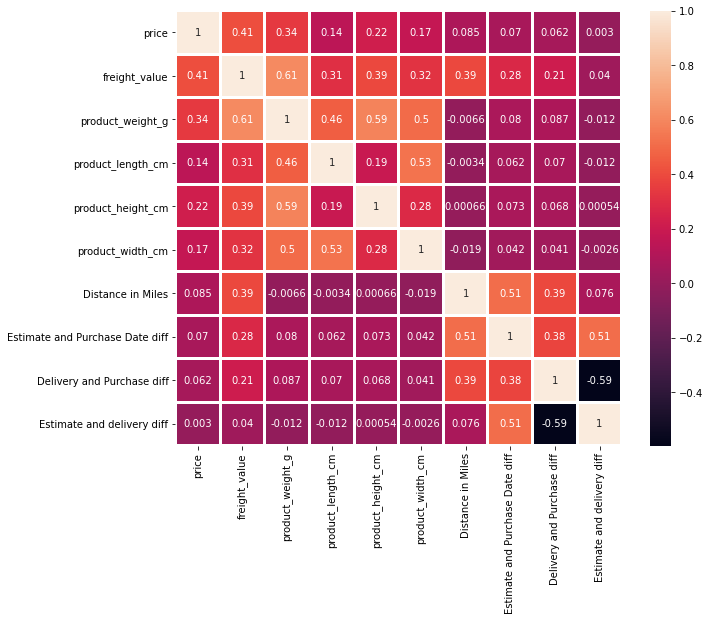

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8)) 
hm = sn.heatmap(data = pd_data.corr(),annot=True, linewidths=2, ax =ax)
  
# displaying the plotted heatmap
plt.show()

In [7]:
categorical_cols = [ 'customer_city', 'seller_city','product_category_name_english']
dataframe = pd.get_dummies(pd_data, columns=categorical_cols)



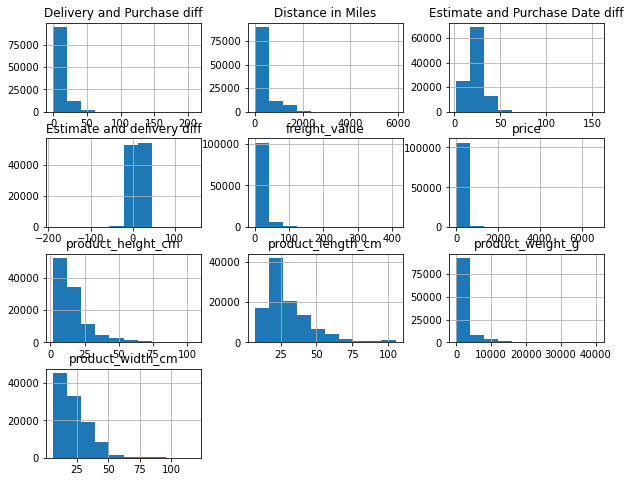

In [9]:
pd_data.hist(figsize=(10,8))
plt.show()


In [ ]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
  
#pd_data['customer_city']= label_encoder.fit_transform(pd_data['customer_city'])
#pd_data['seller_city']= label_encoder.fit_transform(pd_data['seller_city'])
#pd_data['product_category_name_english']= label_encoder.fit_transform(pd_data['product_category_name_english'])

#dataframe = pd_data

In [7]:
estimate_V_delivery_diff = dataframe['Estimate and delivery diff']
Y = dataframe['Delivery and Purchase diff']
estimate_Y = dataframe['Estimate and Purchase Date diff']

In [8]:
dataframe = dataframe.drop(['Estimate and delivery diff','Delivery and Purchase diff','Estimate and Purchase Date diff'], axis=1)

In [ ]:
#for i in range(0,len(Y)) :
#    #print(i,end='\r')
#    rem = Y[i] % 3
#    if rem == 0:
#        pass
#    else :
#      pass
        #Y[i] += 3 - rem
        

In [9]:
#print((Y.unique()))
X = dataframe.iloc[:,:].values
Y = Y.values

In [10]:
import numpy as np
np.isnan(Y).any()
dataframe

,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Distance in Miles,customer_city_abadia dos dourados,customer_city_abaetetuba,customer_city_abre campo,customer_city_abreu e lima,customer_city_acailandia,customer_city_acarau,customer_city_acopiara,customer_city_adamantina,customer_city_afonso claudio,customer_city_agua boa,customer_city_agua doce,customer_city_agua doce do norte,customer_city_aguas belas,customer_city_aguas da prata,customer_city_aguas de lindoia,customer_city_aguas formosas,customer_city_aguas frias,customer_city_aguas lindas de goias,customer_city_aguas mornas,customer_city_agudos,customer_city_aguia branca,customer_city_aimores,customer_city_aiuruoca,customer_city_alagoinhas,customer_city_alambari,customer_city_alcinopolis,customer_city_alegre,customer_city_alegrete,customer_city_alegria,customer_city_alem paraiba,customer_city_alexandria,customer_city_alexandrita,customer_city_alexania,...,product_category_name_english_fashio_female_clothing,product_category_name_english_fashion_bags_accessories,product_category_name_english_fashion_childrens_clothes,product_category_name_english_fashion_male_clothing,product_category_name_english_fashion_shoes,product_category_name_english_fashion_sport,product_category_name_english_fashion_underwear_beach,product_category_name_english_fixed_telephony,product_category_name_english_food,product_category_name_english_food_drink,product_category_name_english_furniture_bedroom,product_category_name_english_furniture_decor,product_category_name_english_furniture_living_room,product_category_name_english_garden_tools,product_category_name_english_health_beauty,product_category_name_english_home_appliances,product_category_name_english_home_appliances_2,product_category_name_english_home_comfort_2,product_category_name_english_home_confort,product_category_name_english_home_construction,product_category_name_english_housewares,product_category_name_english_industry_commerce_and_business,product_category_name_english_kitchen_dining_laundry_garden_furniture,product_category_name_english_la_cuisine,product_category_name_english_luggage_accessories,product_category_name_english_market_place,product_category_name_english_music,product_category_name_english_musical_instruments,product_category_name_english_office_furniture,product_category_name_english_party_supplies,product_category_name_english_perfumery,product_category_name_english_pet_shop,product_category_name_english_signaling_and_security,product_category_name_english_small_appliances,product_category_name_english_small_appliances_home_oven_and_coffee,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts
0,45.0,15.65,200.0,16.0,16.0,16.0,533.376427,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,45.0,14.11,200.0,16.0,16.0,16.0,222.352368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,65.0,16.15,100.0,16.0,7.0,11.0,483.405453,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.0,14.52,200.0,16.0,16.0,16.0,257.639832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,45.0,14.52,200.0,16.0,16.0,16.0,257.639832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [13]:
#import xgboost as xgb
X_train.shape

(12834, 2272)

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

n1 = 20000
n2 = 10000
n3 = 5000
n4 = 1000
n5 = 700
n6 = 500
n7 = 250
n8 = 100


data_shape = X_train.shape

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(units=n1, input_shape=data_shape, activation='relu'))
    model.add(layers.Dense(units=n2, activation='relu'))
    model.add(layers.Dense(units=n3, activation='relu'))
    model.add(layers.Dense(units=n4, activation='relu'))
    model.add(layers.Dense(units=n5, activation='relu'))
    model.add(layers.Dense(units=n6, activation='relu'))
    model.add(layers.Dense(units=n7, activation='relu'))
    model.add(layers.Dense(units=n8, activation='relu'))
    return model

In [17]:


model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12834, 20000)      45460000  
_________________________________________________________________
dense_1 (Dense)              (None, 12834, 10000)      200010000 
_________________________________________________________________
dense_2 (Dense)              (None, 12834, 5000)       50005000  
_________________________________________________________________
dense_3 (Dense)              (None, 12834, 1000)       5001000   
_________________________________________________________________
dense_4 (Dense)              (None, 12834, 700)        700700    
_________________________________________________________________
dense_5 (Dense)              (None, 12834, 500)        350500    
_________________________________________________________________
dense_6 (Dense)              (None, 12834, 250)        1

In [ ]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
history = model.fit(X_train,y_train, batch_size=1000, epochs=1000, verbose=2)

Epoch 1/1000
13/13 - 268s - loss: 244149088.0000 - mae: 1382.8322
Epoch 2/1000
13/13 - 264s - loss: 199.4168 - mae: 10.6596
Epoch 3/1000
13/13 - 266s - loss: 215.0205 - mae: 10.9822
Epoch 4/1000
13/13 - 267s - loss: 214.9586 - mae: 10.7762
Epoch 5/1000
13/13 - 269s - loss: 165.6021 - mae: 9.2845
Epoch 6/1000
13/13 - 266s - loss: 173.5997 - mae: 9.6121
Epoch 7/1000
13/13 - 268s - loss: 218.7483 - mae: 10.6130
Epoch 8/1000
13/13 - 267s - loss: 170.1040 - mae: 9.1652
Epoch 9/1000
13/13 - 265s - loss: 150.1728 - mae: 8.6355
Epoch 10/1000
13/13 - 266s - loss: 173.2499 - mae: 9.1751
Epoch 11/1000
13/13 - 269s - loss: 175.4443 - mae: 9.2270
Epoch 12/1000
13/13 - 269s - loss: 142.2592 - mae: 8.2796
Epoch 13/1000
13/13 - 266s - loss: 132.8956 - mae: 7.8203
Epoch 14/1000
13/13 - 266s - loss: 154.5638 - mae: 8.7862
Epoch 15/1000
13/13 - 269s - loss: 190.1946 - mae: 9.3821
Epoch 16/1000
13/13 - 268s - loss: 143.8034 - mae: 8.4182
Epoch 17/1000
13/13 - 267s - loss: 150.9634 - mae: 8.3505
Epoch 18/1

In [ ]:
#classifier = xgb.XGBClassifier(verbosity = 2,max_depth=300)
#classifier.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[16:20:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=11
[16:20:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[16:20:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=13
[16:20:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=8
[16:20:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=9
[16:20:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=8
[16:20:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=8
[16:20:13] INFO: /workspace/src/tree/updater

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=300,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=2)

In [ ]:
import pickle

filename = 'xgb_model_2.sav'
pickle.dump(classifier, open(filename, 'wb'))
#loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
#y_pred = classifier.predict(X_test)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
#print(cm)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.21321534287123828

In [ ]:
Y_predicted = classifier.predict(X)

In [ ]:
Y_estimate_predicted = (Y_predicted - Y)
Y_estimate_predicted
np.mean(Y_estimate_predicted)

-0.5520045140880248

In [ ]:
np.mean(estimate_Y)

23.44377740365937

In [ ]:
pd_data['New Proposed Estimate date diff'] = Y_estimate_predicted

In [ ]:
pd_data.to_csv('xgb_proposed_data')

In [ ]:
pd_data.head(50)

,customer_city,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,product_category_name_english,Distance in Miles,Estimate and Purchase Date diff,Delivery and Purchase diff,Estimate and delivery diff,New Proposed Estimate date diff
0,2890,45.00,15.65,200.0,16.0,16.0,16.0,498,60,533.376427,28,21.0,6.0,0.0
1,3079,45.00,14.11,200.0,16.0,16.0,16.0,498,60,222.352368,21,8.0,13.0,0.0
2,883,65.00,16.15,100.0,16.0,7.0,11.0,498,20,483.405453,22,23.0,-2.0,0.0
3,1168,45.00,14.52,200.0,16.0,16.0,16.0,498,60,257.639832,21,5.0,15.0,0.0
4,1168,45.00,14.52,200.0,16.0,16.0,16.0,498,60,257.639832,21,5.0,15.0,0.0
5,1168,45.00,14.52,200.0,16.0,16.0,16.0,498,60,257.639832,21,5.0,15.0,0.0
6,1168,45.00,14.52,200.0,16.0,16.0,16.0,498,60,257.639832,21,5.0,15.0,0.0
7,2460,67.90,8.72,550.0,47.0,17.0,30.0,475,39,79.894001,12,7.0,4.0,0.0
8,3510,39.90,28.90,15050.0,60.0,25.0,60.0,475,49,6.384820,12,8.0,3.0,0.0
9,1522,24.90,8.72,250.0,25.0,18.0,18.0,475,49,70.421246,22,12.0,10.0,-8.0
